Analyze the distribution of beads. This includes for example properties/plots such as
- histogram/density of: bead distance from CoM (also referred to as `r`)
    - this is done for different gel configurations (especially for different force fields), and at different phases/time steps and compared
    - this allows us to see if the force fields have the desired effect
- 2D densities of the same via pcolor plots
    - this allows us to see if the densities are radially symmetric

In [1]:
import sys

sys.path.append("../")

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from common import GelDir

In [ ]:
# base_dir = Path().home() / "data/mmgel/production4/"
base_dir = Path("../../data/raw/13112024_new_crosslinking_agents=crosslinks")
# base_dir = Path("../../data/raw/")
if not base_dir.exists():
    raise

gel_dirs = list(GelDir(p) for p in base_dir.iterdir() if GelDir.is_gel_dir(p))
len(gel_dirs)

182

In [7]:
def extract_timestep(p: Path) -> int:
    return int(p.stem.split("_")[-1])


def get_bead_paths_df(gel_dir: GelDir) -> pd.DataFrame:
    df_gel_eq = gel_dir.beads_gel_eq()
    if len(df_gel_eq) == 0:
        return pd.DataFrame()
    df_gel_eq["stage"] = "gel_eq"

    df_mmgel_eq = gel_dir.beads_mmgel_eq()
    if len(df_mmgel_eq) > 0:
        df_mmgel_eq["timestep"] += df_gel_eq["timestep"].max()
        df_mmgel_eq["stage"] = "mmgel_eq"

    df = pd.concat([df_gel_eq, df_mmgel_eq], ignore_index=True)

    config = gel_dir.config
    df["forcefield"] = config.agent_force_field
    df["seed"] = config.seed
    df["charge"] = config.charge_per_bead
    df["meshw"] = config.desired_mesh_width
    df["run"] = int(gel_dir.path.name.split("_")[1])

    return df

In [ ]:
bead_df = pd.concat(map(get_bead_paths_df, gel_dirs), ignore_index=True)
display(bead_df)

In [ ]:
bead_time_subset_df = bead_df[bead_df["timestep"] % 200 == 0]
display(bead_time_subset_df)

## Density over time
- cols: different configs except ff
- rows: time

So in a single ax is the density at time T for gels with config C and all force fields and all run IDs.

In [16]:
# add a new "plot-column" column.
bead_density_df = []
for group_label, group_df in bead_df.groupby(["charge", "meshw"]):
    bead_density_df.append(group_df.copy())
    bead_density_df[-1]["charge,meshw"] = [group_label]*len(group_df)
    bead_density_df[-1].drop(columns=["charge", "meshw"], inplace=True)
bead_density_df = pd.concat(bead_density_df, ignore_index=True)
bead_density_df

path timestep     stage  \
0   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      100    gel_eq   
1   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      200    gel_eq   
2   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      300    gel_eq   
3   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      400    gel_eq   
4   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      500    gel_eq   
5   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      600    gel_eq   
6   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      700    gel_eq   
7   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      800    gel_eq   
8   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      900    gel_eq   
9   ../../data/raw/run_1_magnetic_test2/raw/gel_eq...     1000    gel_eq   
10  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     1100  mmgel_eq   
11  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     1200  mmgel_eq   
12  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     1300  mmgel_eq   
13  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     1400  mmgel_eq   
14  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     1500  mmgel_eq   
15  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     1600  mmgel_eq   
16  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     1700  mmgel_eq   
17  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     1800  mmgel_eq   
18  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     1900  mmgel_eq   
19  ../../data/raw/run_1_magnetic_test2/raw/mmgel_...     2000  mmgel_eq   
20  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...      100    gel_eq   
21  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...      200    gel_eq   
22  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...      300    gel_eq   
23  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...      400    gel_eq   
24  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...      500    gel_eq   
25  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...      600    gel_eq   
26  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...      700    gel_eq   
27  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...      800    gel_eq   
28  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...      900    gel_eq   
29  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...     1000    gel_eq   

   forcefield        seed  run charge,meshw  
0    harmonic   915571835    1  (0.15, 6.0)  
1    harmonic   915571835    1  (0.15, 6.0)  
2    harmonic   915571835    1  (0.15, 6.0)  
3    harmonic   915571835    1  (0.15, 6.0)  
4    harmonic   915571835    1  (0.15, 6.0)  
5    harmonic   915571835    1  (0.15, 6.0)  
6    harmonic   915571835    1  (0.15, 6.0)  
7    harmonic   915571835    1  (0.15, 6.0)  
8    harmonic   915571835    1  (0.15, 6.0)  
9    harmonic   915571835    1  (0.15, 6.0)  
10   harmonic   915571835    1  (0.15, 6.0)  
11   harmonic   915571835    1  (0.15, 6.0)  
12   harmonic   915571835    1  (0.15, 6.0)  
13   harmonic   915571835    1  (0.15, 6.0)  
14   harmonic   915571835    1  (0.15, 6.0)  
15   harmonic   915571835    1  (0.15, 6.0)  
16   harmonic   915571835    1  (0.15, 6.0)  
17   harmonic   915571835    1  (0.15, 6.0)  
18   harmonic   915571835    1  (0.15, 6.0)  
19   harmonic   915571835    1  (0.15, 6.0)  
20   harmonic  1207022368    0  (0.15, 6.0)  
21   harmonic  1207022368    0  (0.15, 6.0)  
22   harmonic  1207022368    0  (0.15, 6.0)  
23   harmonic  1207022368    0  (0.15, 6.0)  
24   harmonic  1207022368    0  (0.15, 6.0)  
25   harmonic  1207022368    0  (0.15, 6.0)  
26   harmonic  1207022368    0  (0.15, 6.0)  
27   harmonic  1207022368    0  (0.15, 6.0)  
28   harmonic  1207022368    0  (0.15, 6.0)  
29   harmonic  1207022368    0  (0.15, 6.0)

In [17]:
from analysis.distribution import rnd_from_file

# bins = np.linspace(0,max_constraint_radius,13)[1:]
rs_and_dens = [rnd_from_file(p) for p in bead_density_df["path"]]
bead_density_df["r"] = [t[0] for t in rs_and_dens]
bead_density_df["density"] = [t[1] for t in rs_and_dens]
bead_density_df = bead_density_df.explode(["r", "density"]).reset_index(drop=True)
bead_density_df

path timestep   stage  \
0    ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      100  gel_eq   
1    ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      100  gel_eq   
2    ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      100  gel_eq   
3    ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      100  gel_eq   
4    ../../data/raw/run_1_magnetic_test2/raw/gel_eq...      100  gel_eq   
..                                                 ...      ...     ...   
348  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...     1000  gel_eq   
349  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...     1000  gel_eq   
350  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...     1000  gel_eq   
351  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...     1000  gel_eq   
352  ../../data/raw/run_0_magnetic_test/raw/gel_eq/...     1000  gel_eq   

    forcefield        seed  run charge,meshw         r   density  
0     harmonic   915571835    1  (0.15, 6.0)  0.523226  0.578868  
1     harmonic   915571835    1  (0.15, 6.0)  0.993679  0.168168  
2     harmonic   915571835    1  (0.15, 6.0)  1.464133  0.312933  
3     harmonic   915571835    1  (0.15, 6.0)  1.934586  0.494715  
4     harmonic   915571835    1  (0.15, 6.0)   2.40504  0.495559  
..         ...         ...  ...          ...       ...       ...  
348   harmonic  1207022368    0  (0.15, 6.0)  5.573658  0.139024  
349   harmonic  1207022368    0  (0.15, 6.0)  6.217833  0.070233  
350   harmonic  1207022368    0  (0.15, 6.0)  6.862009   0.04981  
351   harmonic  1207022368    0  (0.15, 6.0)  7.506185  0.021912  
352   harmonic  1207022368    0  (0.15, 6.0)   8.15036  0.005576  

[353 rows x 9 columns]

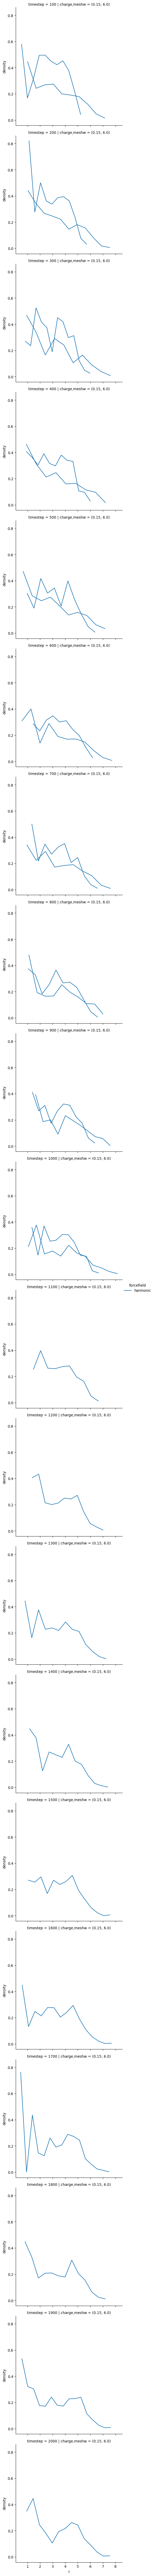

In [18]:
g = sns.relplot(
    data=bead_density_df,
    x="r",
    y="density",
    stage="style",
    dashes=False,
    markers=True,
    hue="forcefield",
    row="timestep",
    col="charge,meshw",
    units="run",
    kind="line",
)

In [ ]:
test = []
for i, (group_label, group_df) in enumerate(
    bead_df.groupby(["run", "charge", "meshw", "timestep"])
):
    group_df["row"] = i
    test.append(group_df.copy())
bead_df = pd.concat(test, ignore_index=True)
bead_df

# Plot bead distributions of gels at the same timestep

Plotting 20 axes


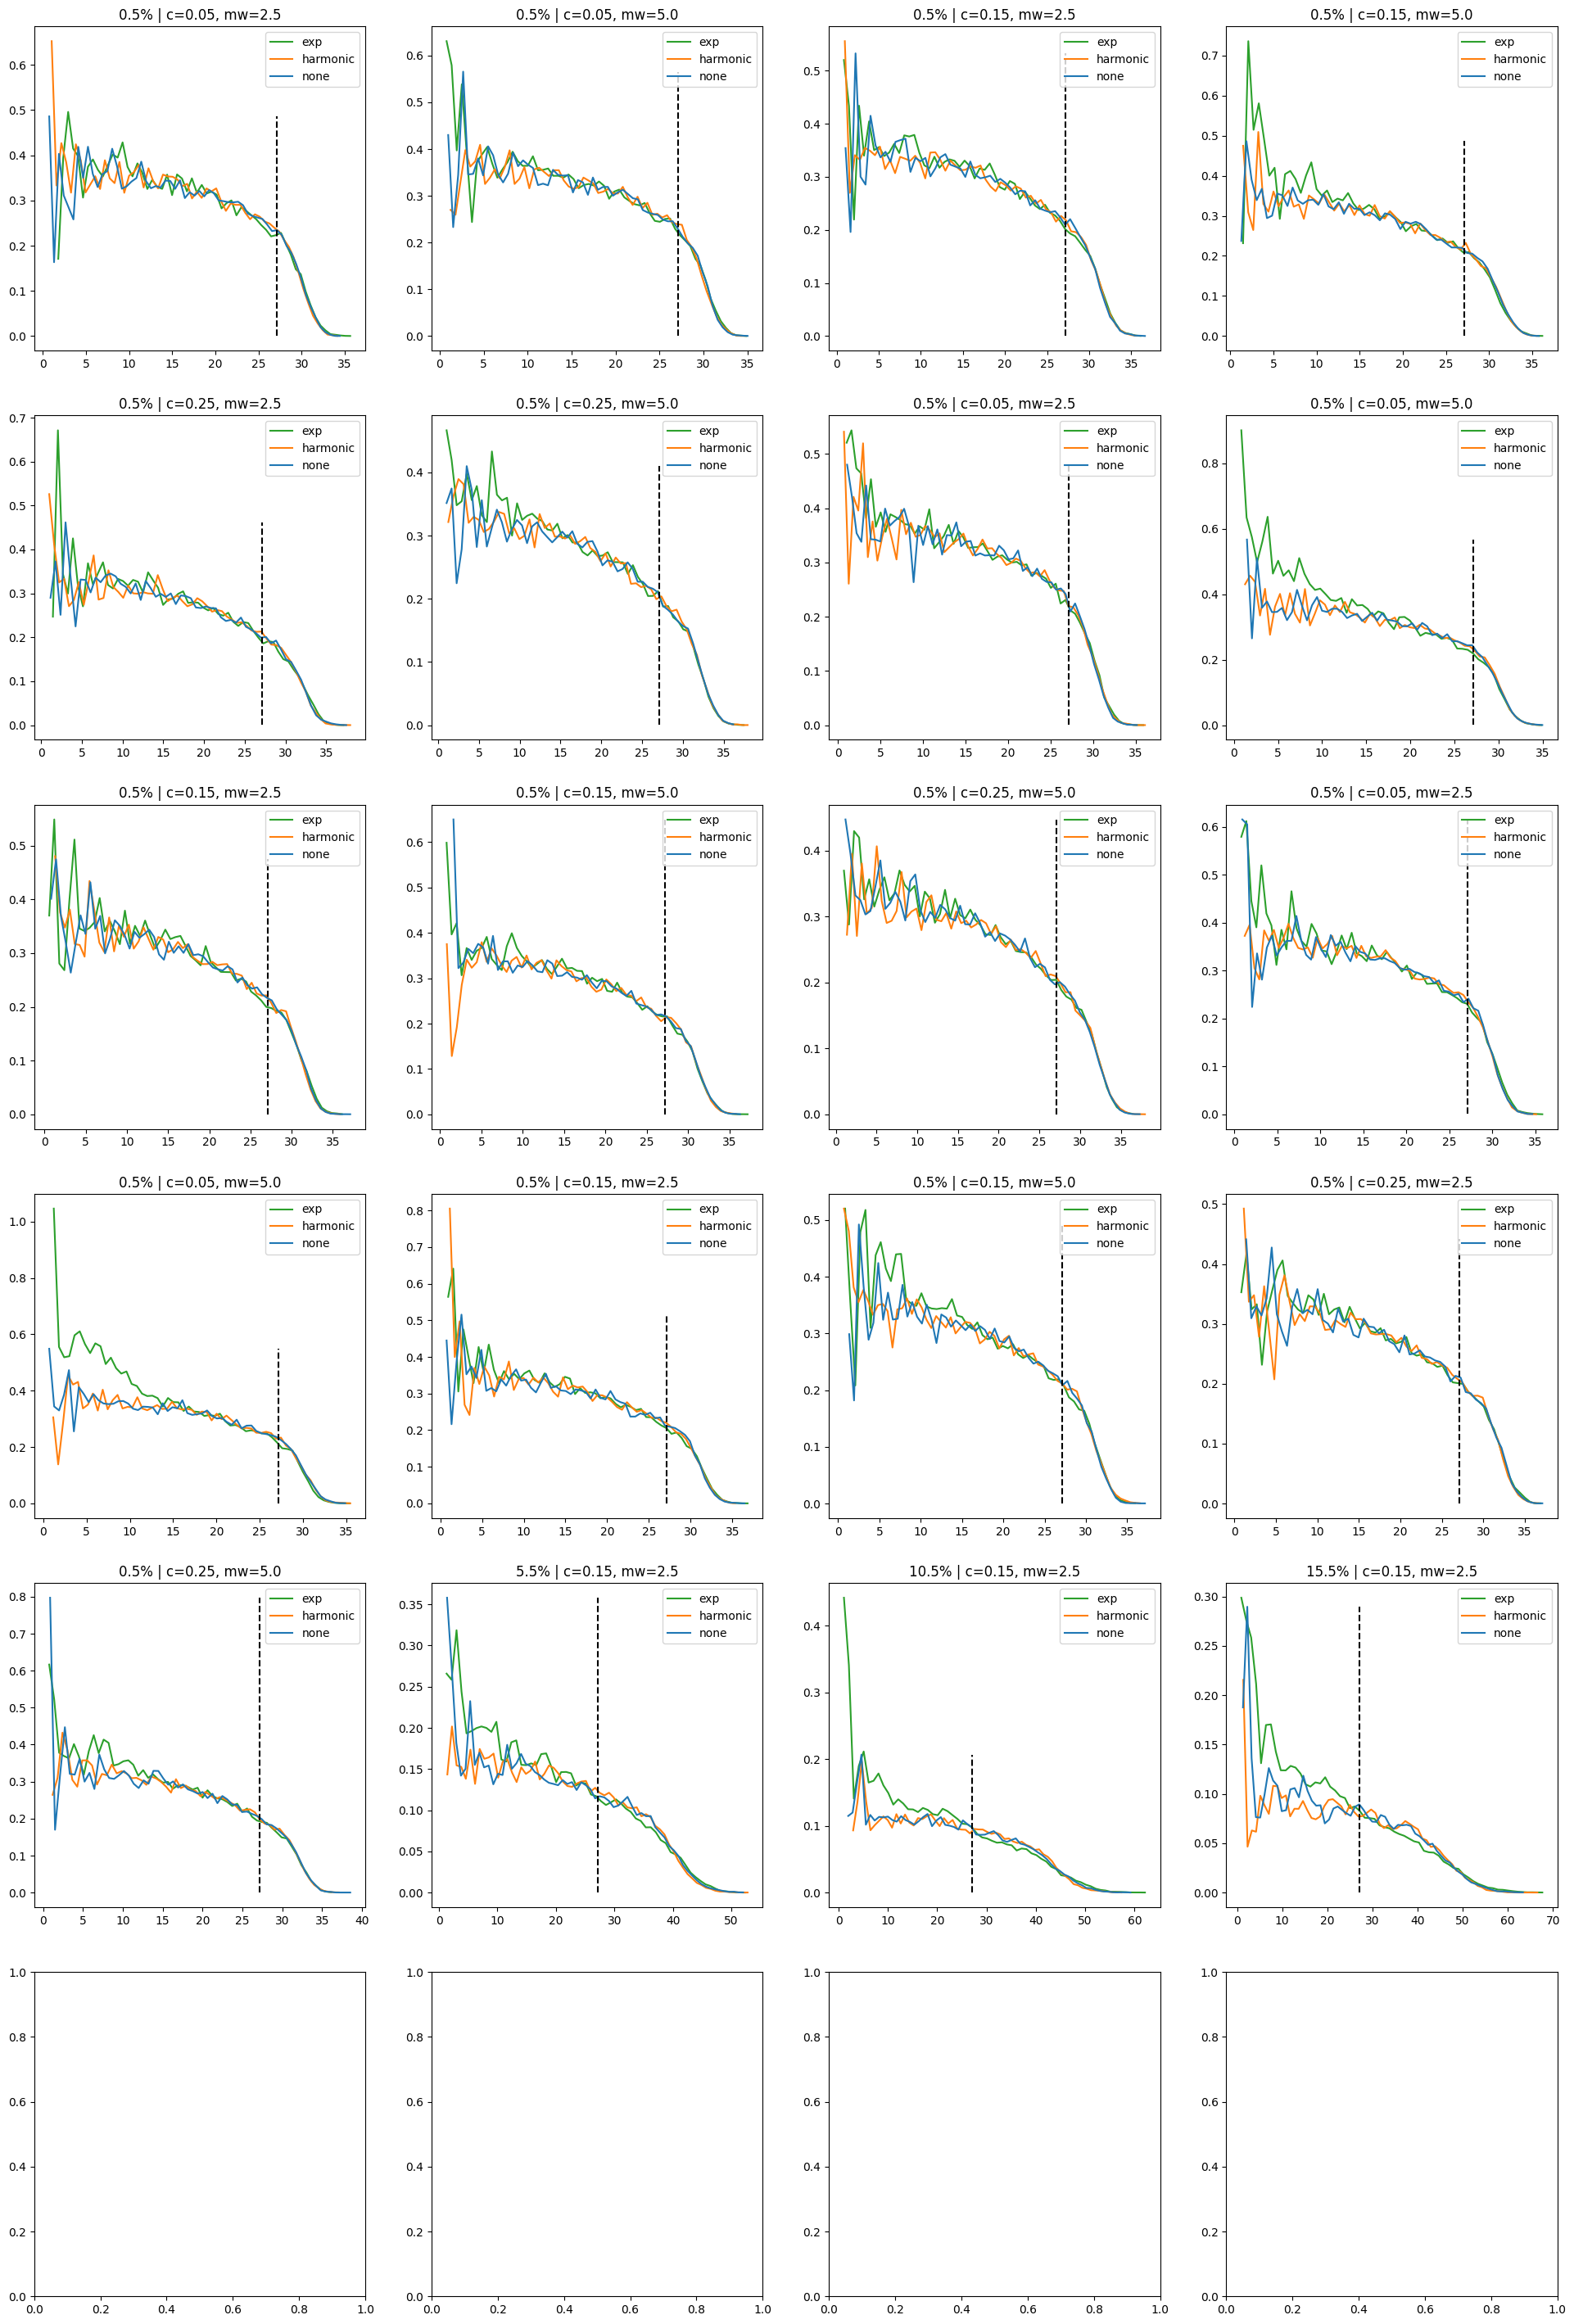

In [8]:
df_labels_and_dfs = []
for i, (group_label, group_df) in enumerate(
    bead_df.groupby(["run", "charge", "meshw", "timestep"])
):
    assert len(group_df) < 4
    # only plot the gels which have a corresponding gel with another force field at the same time step
    if len(group_df) != 3:
        continue
    df_labels_and_dfs.append((group_label, group_df))
# sort by timestep
df_labels_and_dfs = sorted(df_labels_and_dfs, key=lambda x: x[0][3])

print(f"Plotting {len(df_labels_and_dfs)} axes")
ncols = 4
nrows = len(df_labels_and_dfs) // ncols + 1
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(6 * ncols, 6 * nrows), sharex=False, sharey=False
)
axs = axs.ravel()
for ax, (group_label, group_df) in zip(axs, df_labels_and_dfs):
    run, charge, meshw, timestep = group_label
    ax.set_title(f"{100*timestep / 3e6:.1f}% | c={charge}, mw={meshw}")

    ff_to_color = {"none": "C0", "harmonic": "C1", "exp": "C2"}
    for j, (force_field, data) in enumerate(group_df.groupby("forcefield")):
        agent_pos = np.load(data["paths"].iloc[0])
        distance_from_center = np.linalg.norm(agent_pos - BOX_L / 2, axis=-1)
        density, bin_edges = np.histogram(distance_from_center, bins="auto")

        bin_volumes = 4.0 / 3.0 * np.pi * (bin_edges[1:] ** 3 - bin_edges[:-1] ** 3)
        density = density / bin_volumes
        bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

        ax.plot(bin_centers, density, color=ff_to_color[force_field], label=force_field)

    ax.vlines(
        config.constraint_radius,
        density.min(),
        density.max(),
        color="black",
        linestyles="--",
    )
    ax.legend()

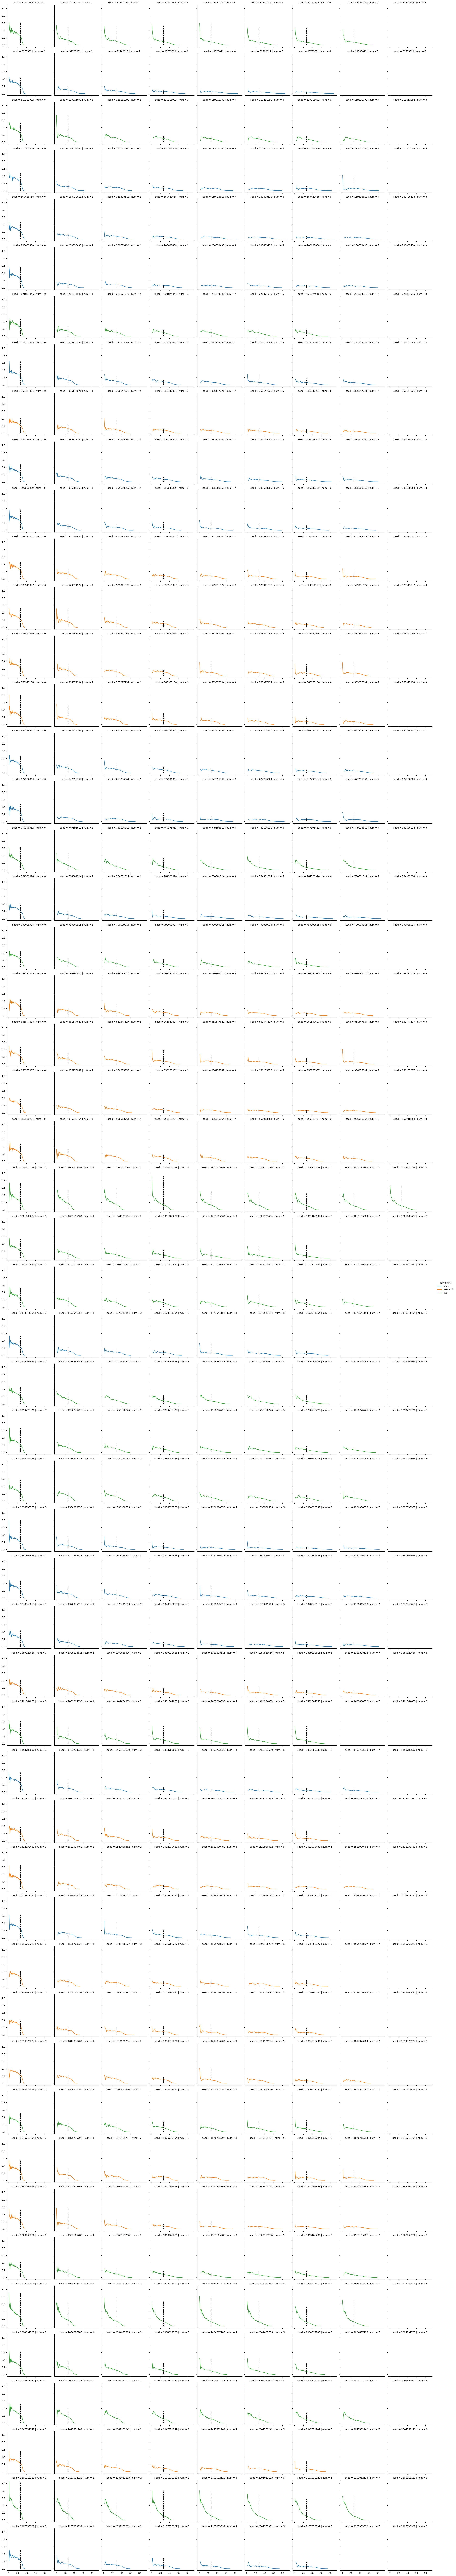

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot_density(df):
    g = sns.FacetGrid(
        df, col="num", row="seed", hue="forcefield", sharex=True, sharey=True
    )

    def density_lines(data, color, **kwargs):
        agent_pos = np.load(data["paths"].iloc[0])
        ax = plt.gca()
        distance_from_center = np.linalg.norm(agent_pos - BOX_L / 2, axis=-1)
        density, bin_edges = np.histogram(distance_from_center, bins="auto")

        bin_volumes = 4.0 / 3.0 * np.pi * (bin_edges[1:] ** 3 - bin_edges[:-1] ** 3)
        density = density / bin_volumes
        bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

        ax.plot(bin_centers, density, color=color, label=data["forcefield"].iloc[0])
        ax.vlines(
            config.constraint_radius,
            density.min(),
            density.max(),
            color="black",
            linestyles="--",
        )

    g.map_dataframe(density_lines)
    g.add_legend()
    plt.show()


plot_density(bead_df)

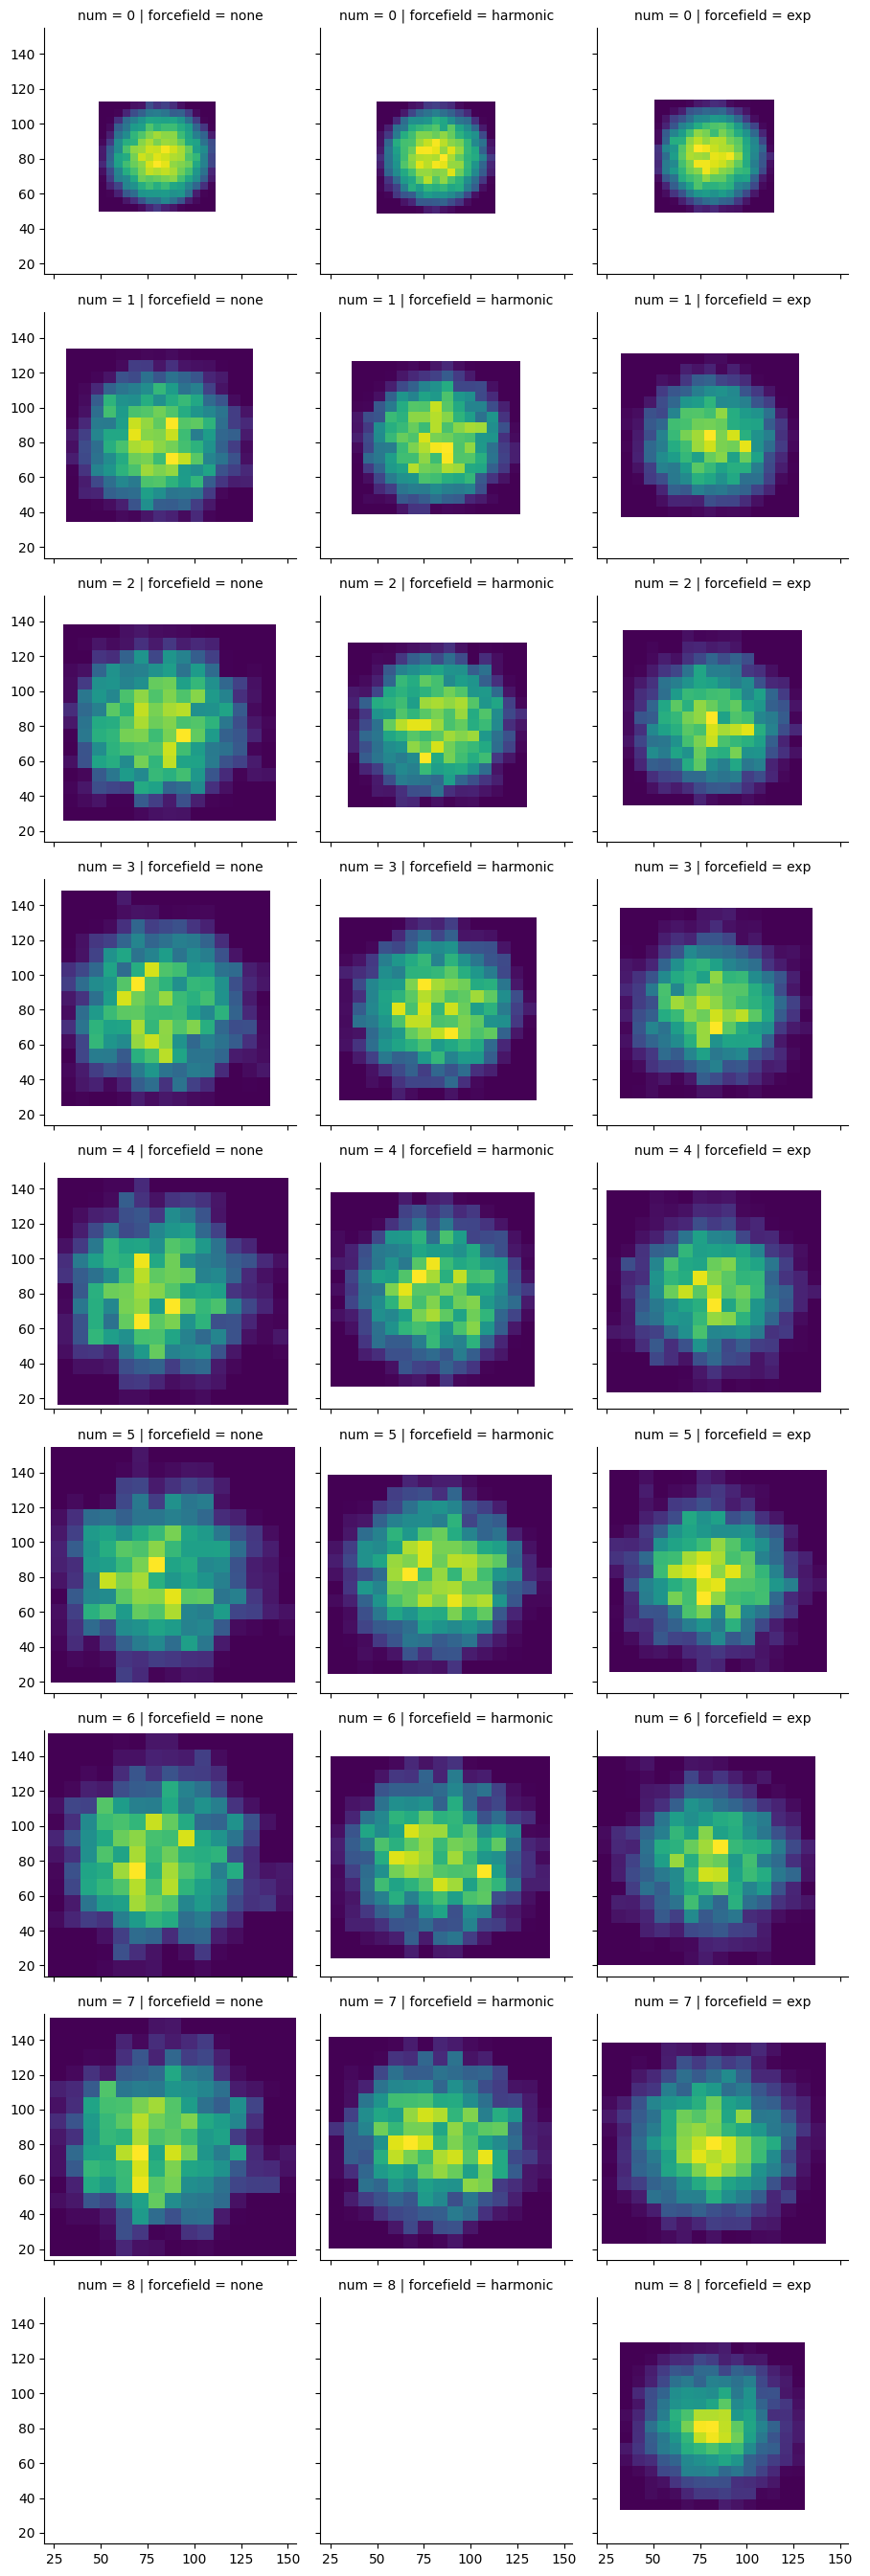

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot_density_2D(df):
    g = sns.FacetGrid(df, row="num", col="forcefield", sharex=True, sharey=True)

    def density_colors(data, color, **kwargs):
        pos = np.load(data["paths"].iloc[0])
        # # slice through center
        # com = np.mean(pos, axis=0)
        # print(len(pos))
        # pos = pos[np.abs(pos[:, 2] - com[2]) < 15.0]
        # print(len(pos))
        # print()

        density, xedges, yedges = np.histogram2d(
            pos[:, 0], pos[:, 1], bins=15, density=True
        )
        density = density.T

        X, Y = np.meshgrid(xedges, yedges)

        ax = plt.gca()
        ax.pcolormesh(X, Y, density)

    g.map_dataframe(density_colors)
    g.add_legend()
    plt.show()


plot_density_2D(bead_df)